# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [180]:
import pandas as pd
import numpy as np

In [181]:
data = pd.read_csv("C:/Users/User/Майнор ИАД/2 семестр/Домашки/ДЗ_6/train.csv")

In [182]:
data.shape

(7613, 5)

In [183]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [145]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [184]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [185]:
data = data.fillna('')

In [186]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [187]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [188]:
data['count'] = np.ones_like(data.target)

In [189]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [190]:
a = data.groupby('keyword')['count'].sum().sort_values(ascending=False)[0:10]

In [191]:
a

keyword
               61
fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
evacuate       40
fear           40
Name: count, dtype: int64

In [192]:
list_index = a.index

In [193]:
b = data.groupby('keyword')['target'].sum()[list_index] / data.groupby('keyword')['count'].sum()[list_index]

In [194]:
b = pd.DataFrame(b)

In [195]:
b

,0
keyword,
,0.688525
fatalities,0.577778
deluge,0.142857
armageddon,0.119048
sinking,0.195122
damage,0.463415
harm,0.097561
body%20bags,0.024390
evacuate,0.625000


In [196]:
b['keyword'] = b.index

In [197]:
b.rename(columns={0: 'proportion'}, inplace=True)

In [198]:
b

,proportion,keyword
keyword,,
,0.688525,
fatalities,0.577778,fatalities
deluge,0.142857,deluge
armageddon,0.119048,armageddon
sinking,0.195122,sinking
damage,0.463415,damage
harm,0.097561,harm
body%20bags,0.024390,body%20bags
evacuate,0.625000,evacuate


Text(0.5, 1.0, 'Распределение классов в зависимости от keyword')

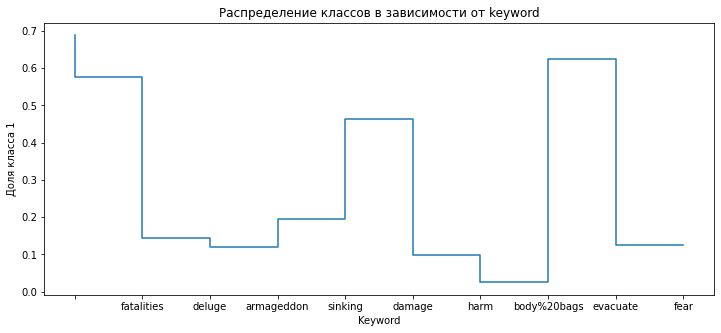

In [199]:
figure(figsize = (12, 5))
plt.step(x='keyword', y='proportion', data=b)
plt.xlabel('Keyword')
plt.ylabel('Доля класса 1')
plt.title('Распределение классов в зависимости от keyword')

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [200]:
data.head()

,id,keyword,location,text,target,count
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,1
1,4,,,Forest fire near La Ronge Sask. Canada,1,1
2,5,,,All residents asked to 'shelter in place' are ...,1,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1,1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1,1


In [201]:
data.drop('id', axis=1, inplace=True)
data.drop('count', axis=1, inplace=True)

In [202]:
data['keyword_location_text'] = data.keyword + ' ' + data.location + ' ' + data.text

In [204]:
data.drop('keyword', axis=1, inplace=True)
data.drop('location', axis=1, inplace=True)
data.drop('text', axis=1, inplace=True)

In [207]:
data.head()

,target,keyword_location_text
0,1,Our Deeds are the Reason of this #earthquake...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' ar...
3,1,"13,000 people receive #wildfires evacuation ..."
4,1,Just got sent this photo from Ruby #Alaska a...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [208]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

In [210]:
train.shape

(5329, 2)

In [211]:
train

,target,keyword_location_text
1186,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,1,police Houston CNN: Tennessee movie theater s...
5787,1,rioting Still rioting in a couple of hours le...
7445,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5226,0,obliteration Merica! @Eganator2000 There aren'...
5390,0,panic just had a panic attack bc I don't have...
860,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,1,Officials say a quarantine is in place at an...


In [212]:
from nltk import ngrams

In [213]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

In [214]:
bow.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [215]:
voc = list(vec.vocabulary_.items())

In [216]:
import string

In [217]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)



def ispunct(a):
    if a in string.punctuation:
        return True
    else:
        return False

    
    
def is_dog(a):
    if a == '@':
        return True
    elif a == '#':
        return True
    else:
        return False


def has_punctuation(inputString):
    return any(ispunct(char) for char in inputString)


def has_dog(inputString):
    return any(is_dog(char) for char in inputString)

In [218]:
def function5(vocabulary):
    count_num = 0
    for t in vocabulary:
        if has_numbers(t[0]):
            count_num += 1
    
    count_punct = 0
    for t in vocabulary:
        if has_punctuation(t[0]):
            count_punct += 1
    
    count_dog = 0
    for t in vocabulary:
        if has_dog(t[0]):
            count_dog += 1
    
    return (count_num, count_punct, count_dog)

In [219]:
function5(voc)

(3812, 315, 0)

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [221]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [222]:
tw = TweetTokenizer()

In [223]:
vec_tweet = CountVectorizer(ngram_range=(1, 1), tokenizer=tw.tokenize)
bow_tweet = vec_tweet.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

In [224]:
bow_tweet.shape

(5329, 19670)

In [225]:
voc_tweet = list(vec_tweet.vocabulary_.items())

In [226]:
function5(voc_tweet)

(3939, 7338, 3155)

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [227]:
from string import printable

In [228]:
from nltk.stem.snowball import SnowballStemmer

In [229]:
def is_latin(text): 
    return not bool(set(text) - set(printable)) 

In [230]:
def is_smilik(inputString):
    return any(char == ')' or char == '(' for char in inputString) and all(ispunct(char) for char in inputString)

In [231]:
def is_hashtag(inputString):
    return (inputString[0] == '#') and (inputString[1:].isalpha())

In [232]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [233]:
def custom_tokenizer(inputString):
    inputString = inputString.lower()
    tw = TweetTokenizer()
    tokenized_string = tw.tokenize(inputString)
    tokenized_string_2 = []
    for t in tokenized_string:
        if (is_smilik(t) or t.isalpha() or is_hashtag(t)) and not(t in nltk.corpus.stopwords.words('english')):
            tokenized_string_2.append(t)
    stemmer = SnowballStemmer('english')
    tokenized_stemmed = [stemmer.stem(w) for w in tokenized_string_2]
    return tokenized_stemmed
custom_tokenizer("In my younger and more vulnerable years :)")

['younger', 'vulner', 'year', ':)']

In [234]:
inx_list = train.index[0:10]
inx_list

Int64Index([1186, 4071, 5461, 5787, 7445, 151, 915, 1305, 2570, 7399], dtype='int64')

In [235]:
for t in inx_list:
    print(custom_tokenizer(train.keyword_location_text[t]))

['bridg', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', '

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [236]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [237]:
vec_tweet_custom = CountVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer)
bow_tweet_custom = vec_tweet_custom.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

bow_test_custom = vec_tweet_custom.transform(test.keyword_location_text)

#scaler = MaxAbsScaler()
#bow_tweet_custom = scaler.fit_transform(bow_tweet_custom)
#bow_test_custom = scaler.transform(bow_test_custom)

In [238]:
bow_tweet_custom.shape

(5329, 10591)

In [239]:
voc_tweet_custom = list(vec_tweet_custom.vocabulary_.items())

In [240]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_tweet_custom, train.target)
pred = clf.predict(bow_test_custom)
print(classification_report(test.target, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [241]:
vec_tweet_custom_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer)
bow_tweet_custom_tf = vec_tweet_custom_tf.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

bow_test_custom_tf = vec_tweet_custom_tf.transform(test.keyword_location_text)


#Со скейлерами почему-то хуже)))
#scaler = MaxAbsScaler()
#bow_tweet_custom_tf = scaler.fit_transform(bow_tweet_custom_tf)
#bow_test_custom_tf = scaler.transform(bow_test_custom_tf)

In [242]:
bow_tweet_custom_tf

<5329x10591 sparse matrix of type '<class 'numpy.float64'>'
	with 51341 stored elements in Compressed Sparse Row format>

In [243]:
clf_tf = LogisticRegression(max_iter=300, random_state=42)
clf_tf.fit(bow_tweet_custom_tf, train.target)
pred_tf = clf_tf.predict(bow_test_custom_tf)
print(classification_report(test.target, pred_tf))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1318
           1       0.80      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [ ]:
#Качество с TfIdf ухудшилось

In [244]:
vec_tweet_custom_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, max_df=0.9)
bow_tweet_custom_tf = vec_tweet_custom_tf.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

bow_test_custom_tf = vec_tweet_custom_tf.transform(test.keyword_location_text)




scaler = MaxAbsScaler()
bow_tweet_custom_tf = scaler.fit_transform(bow_tweet_custom_tf)
bow_test_custom_tf = scaler.transform(bow_test_custom_tf)

In [245]:
bow_tweet_custom_tf

<5329x10591 sparse matrix of type '<class 'numpy.float64'>'
	with 51341 stored elements in Compressed Sparse Row format>

In [246]:
clf_tf = LogisticRegression(max_iter=300, random_state=42)
clf_tf.fit(bow_tweet_custom_tf, train.target)
pred_tf = clf_tf.predict(bow_test_custom_tf)
print(classification_report(test.target, pred_tf))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.78      0.70      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
#При max_df=0.9 качество не поменялось и размер тоже

In [250]:
vec_tweet_custom_tf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, min_df=0.001)
bow_tweet_custom_tf = vec_tweet_custom_tf.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

bow_test_custom_tf = vec_tweet_custom_tf.transform(test.keyword_location_text)




scaler = MaxAbsScaler()
bow_tweet_custom_tf = scaler.fit_transform(bow_tweet_custom_tf)
bow_test_custom_tf = scaler.transform(bow_test_custom_tf)

In [251]:
bow_tweet_custom_tf

<5329x1753 sparse matrix of type '<class 'numpy.float64'>'
	with 37319 stored elements in Compressed Sparse Row format>

In [252]:
clf_tf = LogisticRegression(max_iter=300, random_state=42)
clf_tf.fit(bow_tweet_custom_tf, train.target)
pred_tf = clf_tf.predict(bow_test_custom_tf)
print(classification_report(test.target, pred_tf))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.78      0.71      0.74       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [ ]:
#При min_df=0.001 качество не поменялось, но размер матрицы уменьшился
#И вообще добиться улучшения качества не получается, но получается уменьшить размер матрицы

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [253]:
from sklearn.feature_extraction.text import HashingVectorizer

In [254]:
vec_tweet_custom = HashingVectorizer(ngram_range=(1, 1), tokenizer=custom_tokenizer, n_features=5000)
bow_tweet_custom = vec_tweet_custom.fit_transform(train.keyword_location_text) # bow — bag of words (мешок слов)

bow_test_custom = vec_tweet_custom.transform(test.keyword_location_text)

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [255]:
bow_tweet_custom

<5329x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 51301 stored elements in Compressed Sparse Row format>

In [256]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow_tweet_custom, train.target)
pred = clf.predict(bow_test_custom)
print(classification_report(test.target, pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1318
           1       0.78      0.67      0.72       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.77      2284
weighted avg       0.78      0.78      0.78      2284



In [ ]:
#Самый высокий результат у обычного CountVectorizer'а)))

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [72]:
#получилось в 8ом задании